In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Code was run ahead of time because LinkedList takes way too long
!java -cp target/classes ece325.Benchmark ll | tee resultsll.csv

collection,n,add,remove
java.util.LinkedList,	32,	1.09294E-4,	3.3187E-5
java.util.LinkedList,	64,	2.3278E-4,	2.5495E-5
java.util.LinkedList,	128,	9.8735E-5,	1.82E-5
java.util.LinkedList,	256,	2.78009E-4,	4.1021E-5
java.util.LinkedList,	512,	0.001052544,	1.24427E-4
java.util.LinkedList,	1024,	0.003206364,	3.88755E-4
java.util.LinkedList,	2048,	0.018115869,	0.001906605
java.util.LinkedList,	4096,	0.104152711,	0.008973021
java.util.LinkedList,	8192,	0.742417431,	0.069273563
java.util.LinkedList,	16384,	4.782073431,	0.387557389


In [15]:
!java -cp target/classes ece325.Benchmark | tee results.csv
!cat resultsll.csv >> results.csv

collection,n,add,remove
java.util.ArrayList,	32,	9.8013E-5,	3.3472E-5
java.util.ArrayList,	64,	1.27783E-4,	5.176E-5
java.util.ArrayList,	128,	6.3171E-5,	2.4867E-5
java.util.ArrayList,	256,	1.2966E-4,	3.389E-5
java.util.ArrayList,	512,	2.3612E-4,	6.7911E-5
java.util.ArrayList,	1024,	3.27956E-4,	1.56207E-4
java.util.ArrayList,	2048,	6.28044E-4,	3.24204E-4
java.util.ArrayList,	4096,	0.00132802,	7.1306E-4
java.util.ArrayList,	8192,	0.00348497,	0.002108559
java.util.ArrayList,	16384,	0.010435246,	0.007688105
java.util.Vector,	32,	4.9076E-5,	1.4225E-5
java.util.Vector,	64,	5.2812E-5,	1.2384E-5
java.util.Vector,	128,	1.02258E-4,	9.776E-6
java.util.Vector,	256,	2.37935E-4,	2.6338E-5
java.util.Vector,	512,	4.21113E-4,	6.7774E-5
java.util.Vector,	1024,	2.73308E-4,	1.13623E-4
java.util.Vector,	2048,	5.75037E-4,	2.56402E-4
java.util.Vector,	4096,	0.001446592,	6.94989E-4
java.util.Vector,	8192,	0.004244897,	0.002486188
java.util.Vector,	16384,	0.010641491,	0.007750088
ece325.SkipListList,	32,	3.499

In [23]:
data = pd.read_csv("results.csv")

def get_collection(name):
    return data[data.collection==name]

labels = ["java.util.ArrayList", "java.util.LinkedList", "java.util.Vector", "ece325.SkipListList"]

n = len(labels)
collections = np.empty(n, dtype=object)

for i in range(n):
    collections[i] = get_collection(labels[i])

# exclude ll
excludeLL = False
# excludeLL = True

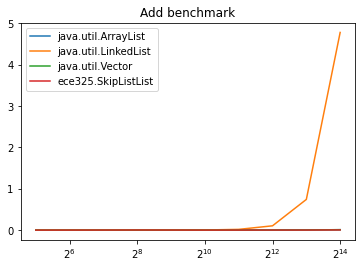

In [24]:
plt.title("Add benchmark")
plt.xscale('log', base=2)

for i in range(n):
    if excludeLL and i == 1: continue 

    plt.plot(collections[i]["n"], collections[i]["add"], label=labels[i])

plt.legend();

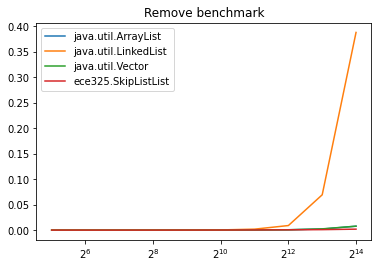

In [25]:
plt.title("Remove benchmark")
plt.xscale('log', base=2)
for i in range(n):
    # remove LinkedList from plot
    if excludeLL and i == 1: continue

    plt.plot(collections[i]["n"], collections[i]["remove"], label=labels[i])

plt.legend();



## Results

SkipList is **equal in performance** with Vector and ArrayList at n = 2^10, it is significantly worse with smaller n  
SkipList starts to **outperform all Collections** at n = 2^12 for both add and remove operations